<a href="https://colab.research.google.com/github/sfsernao/Bootcamp_BSU_MIT/blob/main/heterodyne_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrice dimension : (1249988,)


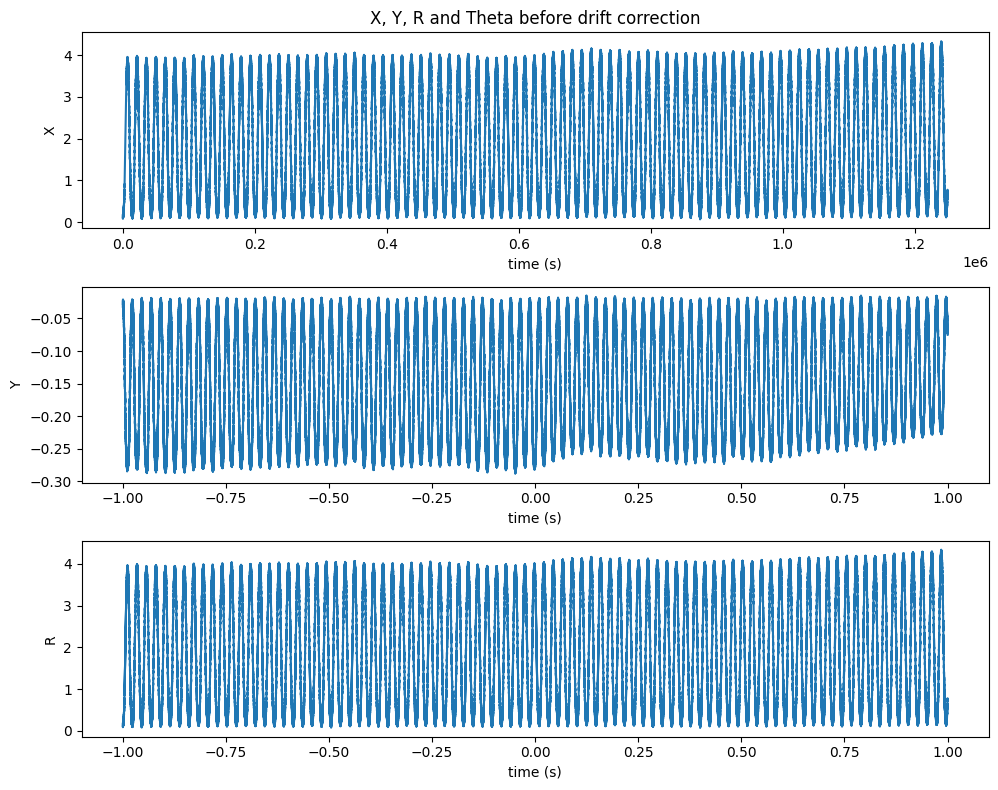

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


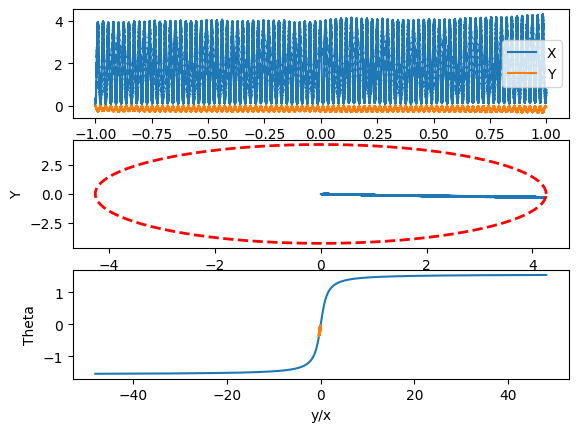

<ipython-input-24-8a8550dd8b4c>:130: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


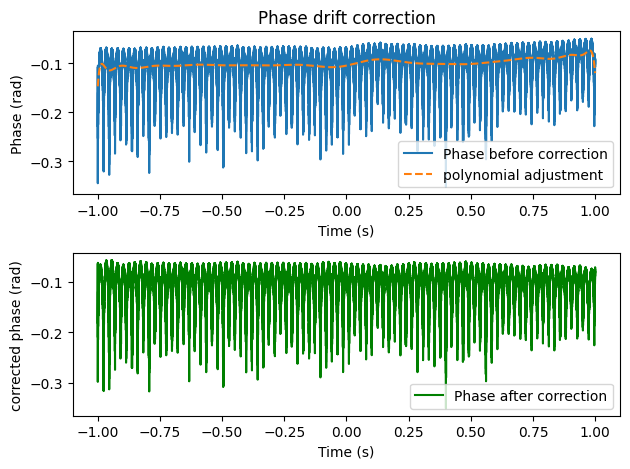

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Laoding file
TT = "/content/first_ALL.csv"
data_lines = (12, 1250000)
data1 = pd.read_csv(TT, skiprows=data_lines[0], nrows=data_lines[1] - data_lines[0], header=None).to_numpy()

tt = data1[:, 0]  # column 1
X = data1[:, 1]   # column 3
Y = data1[:, 2]   # column 2
dimensions = X.shape
print("Matrice dimension :", dimensions)
# Number of point
nbre_pts_lu = len(Y)


# Initialization
dt = 660e-15       # impulsion time (s)
lambda0 = 1550e-9  # center wavelength (m)
Pin = 109.2e-9      # Power input in waveguide (W)
Pout_wg = 105.7e-9    # Initial Power output of the waveguide (W)
Popt_b = 44.4      # Initial Power output of the fiber white of the photodiode (microW)
Pav = np.sqrt(Pin * Pout_wg * 11.09 / Popt_b)  # Average power (11.06 is the new power of the new position)
Ppeak = Pav / (dt * 100e6)  # laser frequency = 100 MHz

# total Amplitude and phase
R1 = np.sqrt(X**2 + Y**2)  # total Amplitude
thet1 = np.arctan2(Y, X)   # Total phase


# Plot of X, Y et amplitude/phase
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot( X, label="X")
plt.title("X, Y, R and Theta before drift correction")
plt.xlabel("time (s)")
plt.ylabel("X")
plt.subplot(3, 1, 2)
plt.plot(tt, Y, label="Y")
plt.xlabel("time (s)")
plt.ylabel("Y")
plt.subplot(3, 1, 3)
plt.plot(tt, R1, label="R")
plt.xlabel("time (s)")
plt.ylabel("R")
plt.tight_layout()
plt.show()

# Polynomial adjustment to correct drift
pol = np.polyfit(tt, thet1, 25)  # Polynomial adjustement of 50 degres
tfit2 = np.polyval(pol, tt)  # ajusted phase
thet2 = thet1 - tfit2 + np.mean(thet1)  # Correction drift

# Corrected Vx and Vy
Vx = R1 * np.cos(thet2)
Vy = R1 * np.sin(thet2)

# Trigonometric circle and phase as a function of y/x
rayon = np.max(R1) - np.min(R1)
theta = np.linspace(0, 2 * np.pi, 100)  # Angular parameter for circle plot
xcircle = rayon * np.cos(theta)  # X coordinates of the circle
ycircle = rayon * np.sin(theta)  # Y coordinates of the circle

# Calculate x and y values for a trigonometric circle
t2 = np.linspace(-1.55, 1.55, 20000)
x = np.cos(t2)
y = np.sin(t2)

# Adjust X and Y data based on their sign
u = Vx - np.max(Vx)
v = Vy - np.max(Vy)

if (np.max(Vx) > 0) and (np.max(Vy) > 0):
    u = Vx - np.min(Vx)
    v = Vy - np.min(Vy)
elif (np.max(Vx) > 0) and (np.max(Vy) < 0):
    u = Vx - np.min(Vx)
    v = Vy - np.max(Vy)
elif (np.max(Vx) < 0) and (np.max(Vy) > 0):
    u = Vx - np.max(Vx)
    v = Vy - np.min(Vy)


# Plot the adjusted data and the trigonometric circle
plt.figure(22)
plt.subplot(3, 1, 1)
plt.plot(tt, Vx, label='X')
plt.plot(tt, Vy, label='Y')
plt.xlabel('time (s)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xcircle, ycircle, 'r--', linewidth=2)  # Traced circle

plt.subplot(3, 1, 3)
plt.plot((y / x) - np.max(thet1) / 2, np.arctan(y / x))
plt.plot(Vy / Vx, thet1, linewidth=2)
plt.xlabel('y/x')
plt.ylabel('Theta')

plt.show()


# Viewing results
#plt.figure(figsize=(12, 6))

# Phase before correction
plt.subplot(2, 1, 1)
plt.plot(tt, thet1, label='Phase before correction')
plt.plot(tt, tfit2, '--', label='polynomial adjustment')
plt.title('Phase drift correction')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')
plt.legend()

# Phase after correction
plt.subplot(2, 1, 2)
plt.plot(tt, thet2, label='Phase after correction', color='green')
plt.xlabel('Time (s)')
plt.ylabel('corrected phase (rad)')
plt.legend()

plt.tight_layout()
plt.show()

# Sauvegarde des données nécessaires pour la deuxième partie
np.savez("processed_data.npz", tt=tt, Vx=Vx, Vy=Vy, R1=R1, thet2=thet2, Ppeak=Ppeak)




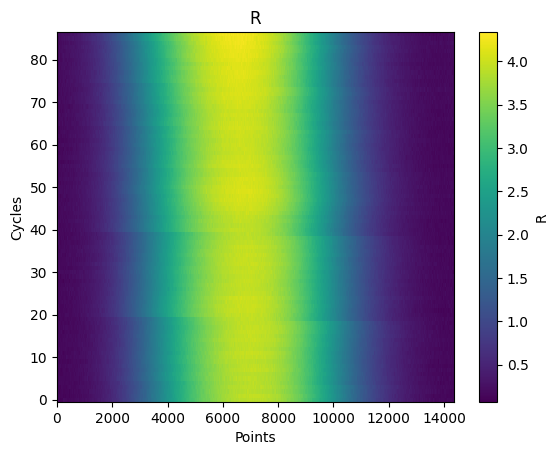

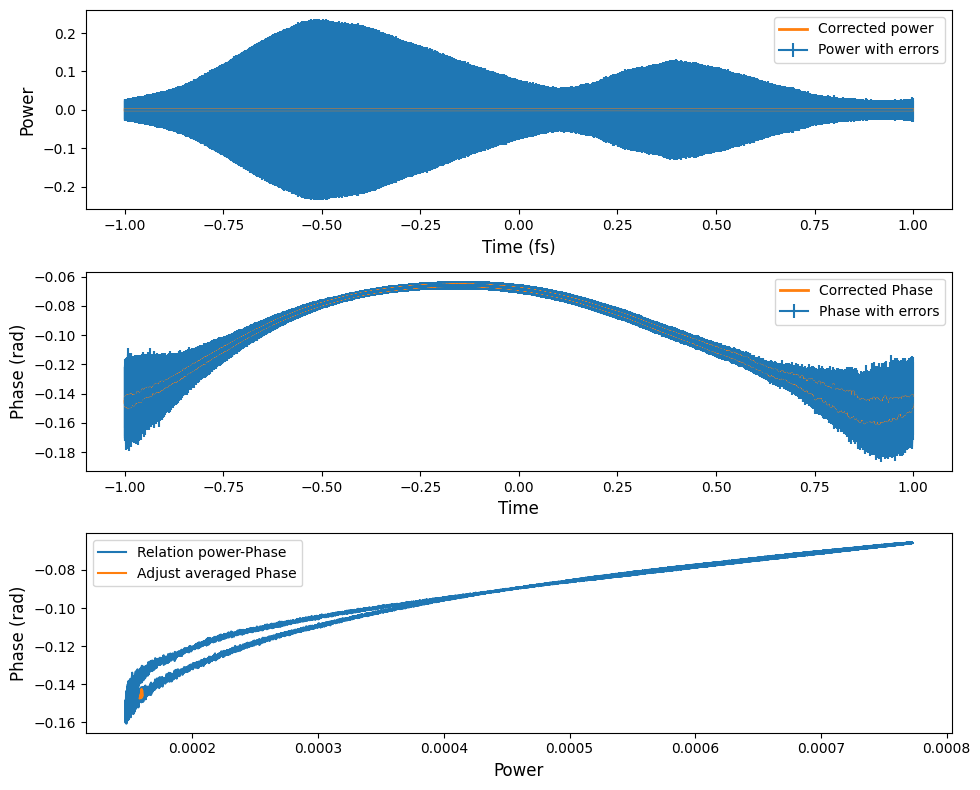

8.018772948237634


In [ ]:
### Cycle Averaging #######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

tt=tt
Vx=Vx
Vy=Vy
R1=R1
thet2=thet2

nn = 14350 # Point number for one period
shift1 = -15000
shear = 0
prt = nbre_pts_lu // nn  # number of period

# Creating matrices for a cycle
diag2 = np.reshape(Vx[:nn * prt], (prt,nn))
diag3 = np.reshape(Vy[:nn * prt], (prt,nn))
diag4 = np.reshape(R1[:nn * prt], (prt,nn))
diag5 = np.reshape(thet2[:nn * prt], (prt,nn))


# Application of offset and shear
for kk in range(prt):
    diag2[:, kk] = np.roll(diag2[:, kk], int(shear * kk) + shift1)
    diag3[:, kk] = np.roll(diag3[:, kk], int(shear * kk) + shift1)
    diag4[:, kk] = np.roll(diag4[:, kk], int(shear * kk) + shift1)
    diag5[:, kk] = np.roll(diag5[:, kk], int(shear * kk) + shift1)

# Displaying R-value matrices
plt.figure(66)
plt.imshow(diag4, aspect='auto', interpolation='none', origin='lower')
plt.colorbar(label="R")
plt.title('R')
plt.xlabel('Points')
plt.ylabel('Cycles')
plt.show()


# Calculation of means and standard errors
RR1 = np.mean(diag4, axis=0)
SD_RR1 = np.std(diag4, axis=0)
SEM_RR1 = SD_RR1 / np.sqrt(nn)

tmed = np.mean(diag5, axis=0)
SD_tmed = np.std(diag5, axis=0)
SEM_tmed = SD_tmed / np.sqrt(nn)

# Time parameters for averaging
maxT = tt[prt * nn - 1] - tt[0]  # Durée maximale
Tp = np.linspace(-maxT / 2, maxT / 2, nn)
XX = diag2[:, 0]
N = len(XX) // 2

# Adjusting averaged data
shift = -15000
RR1 = np.roll(RR1, shift)
tmed = np.roll(tmed, shift)
RR1 = RR1 - np.min(RR1)
RR1 = RR1 / np.max(RR1) * (Ppeak - Ppeak * 23 / 100) + Ppeak * 18 / 100  # VOA Ajustements
Pp = RR1[700:N]
th2 = 0.5 * (tmed[:N] + np.flip(tmed[N:2 * N]))
tht = th2[700:N]

# Viewing final graphs
plt.figure(40, figsize=(10, 8))

# Graph 1 : Power
plt.subplot(3, 1, 1)
plt.errorbar(Tp, RR1, SD_RR1, label='Power with errors')
plt.plot(Tp, RR1, linewidth=2, label='Corrected power')
plt.ylabel('Power', fontsize=12)
plt.xlabel('Time (fs)', fontsize=12)
plt.legend()

# Graph 2 : Phase
plt.subplot(3, 1, 2)
plt.errorbar(Tp, tmed, SD_tmed, label='Phase with errors')
plt.plot(Tp, tmed, linewidth=2, label='Corrected Phase ')
plt.ylabel('Phase (rad)', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend()

# Graph 3 : Relation power-phase
plt.subplot(3, 1, 3)
plt.plot(RR1, tmed, label='Relation power-Phase')
plt.plot(RR1[:N], th2, label='Adjust averaged Phase')
plt.ylabel('Phase (rad)', fontsize=12)
plt.xlabel('Power', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

gamma = (max(th2)-min(th2))/(max(RR1)-min(RR1))
print(gamma)

<ipython-input-3-2432e34d8bc1>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  Acoef, _ = curve_fit(linear_fit, P, B, p0=a0)


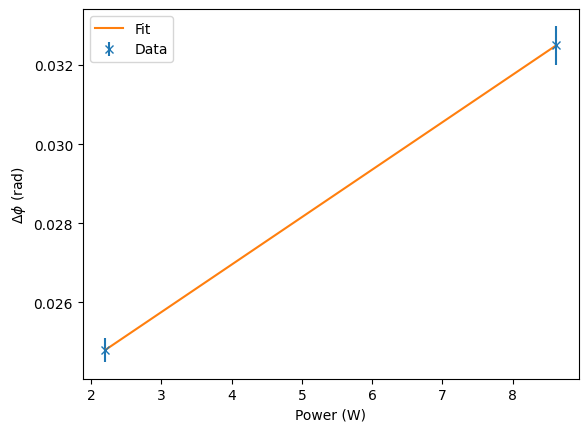

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Initialization of parameters
dt = 660e-15           # Time impulsion (s)
Aeff = 1.13e-12        # Affective area of waveguide (m^2)
wavelength = 1.587e-6  # Center wavelength (m)

L = 6.28e-3            # waveguide's length (m)
exp_alpha = 0.6329     # waveguide's losses

Pin = 4.05e-3          # Power input (W)
Pout_wg = 68e-6        # Power outup (W)
Pout_diode = np.array([43.22, 11.05]) # Power after white fiber for every distance
Kin = Pout_wg / (Pin * exp_alpha * 0.1764) #Kappa in

# Calculation of Pinj in the FUT
A = Pout_diode * Pout_wg / np.max(Pout_diode) #Conversion power diode to power output
aa = 0.066
C = A / np.max(A)    # Report of kini/kin1
P = Pin / (dt * 100e6) * (1 - aa) * Kin * C   # Power injected in the waveguide

# Value of Delta phi
B = np.array([0.0325, 0.0248])
delta_B = np.array([4.9e-4, 3.03e-4])

# Fitting function
def linear_fit(xx, a1, a2):
    return a1 * xx + a2

# Initial guess
a0 = [0.060, -0.0025]

# Curve fitting
Acoef, _ = curve_fit(linear_fit, P, B, p0=a0)
tfit = Acoef[0] * P + Acoef[1]

# Determination of uncertainty
#pol, S = np.polyfit(P, B, 1)
#tfit2 = np.polyval(pol, P)
#delta = np.sqrt(np.diag(S))

# Plot
plt.figure(2)
plt.errorbar(P, B, yerr=delta_B, fmt='x', label='Data')
plt.plot(P, tfit, label='Fit')
plt.xlabel('Power (W)')
plt.ylabel('$\Delta \phi$ (rad)')
plt.legend()
plt.show()

# Calculation of n2
phi = np.max(tfit) - np.min(tfit)
Pp = np.max(P) - np.min(P)

n2 = phi * Aeff * wavelength / (Pp * L * 2 * np.pi)
#dn2 = n2 * np.sqrt((2 * delta[0] / phi) ** 2 + (0.01 / 38.9) ** 2)

b = Acoef[1]
#b = [Acoef[1], 2 * delta[0]]
#N2 = [n2, dn2]

deltaphi = np.max(tfit) - b
